# Numerical Differentiation



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 



analytic dfdx= [ 25.     1.85   0.4    6.25   9.8    6.25  -4.4  -17.35 -23.  ]


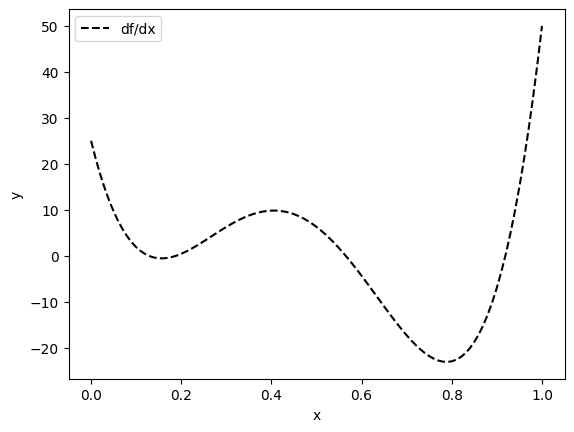

In [6]:
# ex21.4,

f = lambda x: 0.2 + 25.*x - 200.*x**2. + 675.*x**3. - 900.*x**4. + 400.*x**5.

df = lambda x: 25. - 400.* x + 675.*3.*x**2. - 3600.*x**3. + 2000.*x**4.

print('analytic dfdx=', df(x))

xx = np.linspace(0., 1., 101)
yy = df(xx) 

# plt.scatter(x,y,c='k',marker='o')
plt.plot(xx,yy,c='k',ls='--',label='df/dx')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

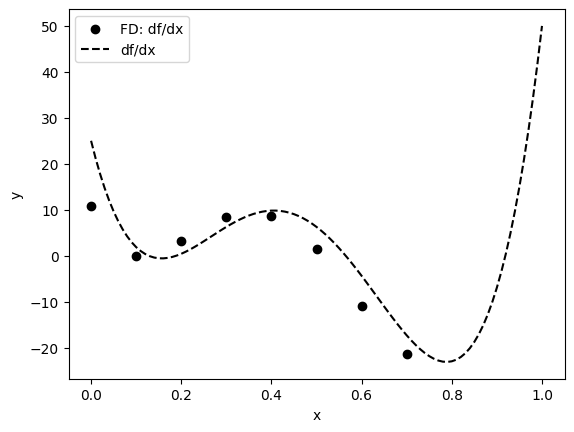

In [16]:
# FD approximation
h = 0.1
x = np.arange(0., 0.9, h)
y = f(x)
dx = np.diff(x)
dy = np.diff(y)
dydx = dy/dx 

plt.scatter(x[0:-1],dydx,c='k',marker='o',label='FD: df/dx')
plt.plot(xx,yy,c='k',ls='--',label='df/dx')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

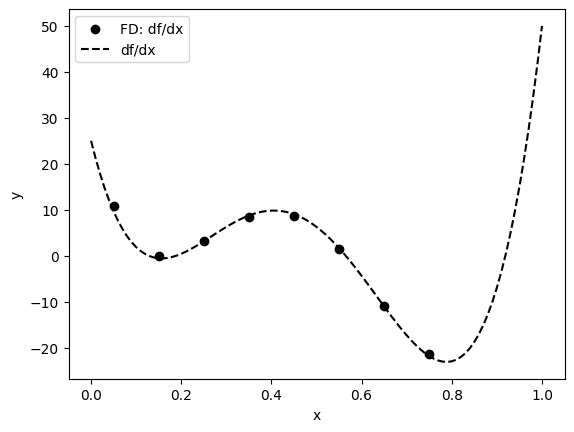

In [17]:
# FD approximation
h = 0.1
x = np.arange(0., 0.9, h)
y = f(x)
dx = np.diff(x)
dy = np.diff(y)
dydx = dy/dx 

xmid = (x[0:-1] + x[1:])/2
plt.scatter(xmid,dydx,c='k',marker='o',label='FD: df/dx')
plt.plot(xx,yy,c='k',ls='--',label='df/dx')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

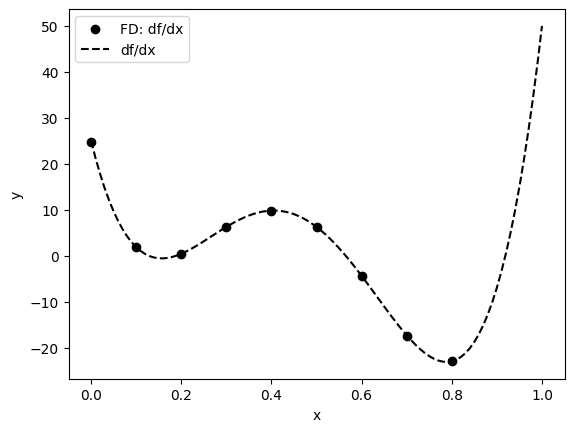

In [23]:
# FD approximation
h = 0.001
x = np.arange(0., 0.9, 0.1)
y = f(x)
dx = h
dy = f(x+h) - f(x)
dydx = dy/dx 

plt.scatter(x,dydx,c='k',marker='o',label='FD: df/dx')
plt.plot(xx,yy,c='k',ls='--',label='df/dx')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [39]:
import jax.numpy as jnp 
import jax 


In [37]:
def sum_logistic(x):
  return jnp.sum(1.0 / (1.0 + jnp.exp(-x)))

x_small = jnp.arange(3.)
derivative_fn = jax.grad(sum_logistic)
print(derivative_fn(x_small))

[0.25       0.19661197 0.10499359]


In [38]:
def first_finite_differences(f, x, eps=1E-3):
  return jnp.array([(f(x + eps * v) - f(x - eps * v)) / (2 * eps)
                   for v in jnp.eye(len(x))])

print(first_finite_differences(sum_logistic, x_small))

[0.24998187 0.1965761  0.10502338]
